In [4]:
#install.packages("sjmisc")
#install.packages("fdth", quiet=TRUE)

library(readxl)
library(sjmisc)
library(fdth)
library(dplyr)

Warning message:
"package 'sjmisc' was built under R version 3.6.3"Learn more about sjmisc with 'browseVignettes("sjmisc")'.

Attaching package: 'fdth'

The following objects are masked from 'package:stats':

    sd, var


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [5]:
options(warn=-1)

In [6]:
dataset <- read_excel("./lapaz_troncales_limpio.xlsx")
dim(dataset)

[1] 70641    17

In [7]:
str(dataset)

Classes 'tbl_df', 'tbl' and 'data.frame':	70641 obs. of  17 variables:
 $ CUE               : num  6e+06 6e+06 6e+06 6e+06 6e+06 ...
 $ EsPrivada         : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ turno             : chr  "MAÑANA" "MAÑANA" "MAÑANA" "MAÑANA" ...
 $ periodoEvaluatorio: chr  "Tercer Trimestre" "Tercer Trimestre" "Tercer Trimestre" "Tercer Trimestre" ...
 $ Documento         : num  1.14e+08 1.14e+08 1.14e+08 1.14e+08 1.14e+08 ...
 $ año               : num  2022 2022 2022 2022 2022 ...
 $ asignatura        : chr  "CIENCIAS NATURALES" "CIENCIAS SOCIALES" "EDUCACIÓN FÍSICA" "LENGUA" ...
 $ NivelEnseñanza    : chr  "PRIMARIO" "PRIMARIO" "PRIMARIO" "PRIMARIO" ...
 $ Nivel             : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Modalidad         : chr  "Primaria" "Primaria" "Primaria" "Primaria" ...
 $ ModEnseñanza      : chr  "Comun" "Comun" "Comun" "Comun" ...
 $ AñoCursado        : num  3 3 3 3 3 5 5 5 5 5 ...
 $ NotasPrimerT      : num  8 8 9 9 10 8 8 7 8 8 ...
 $ NotasSegund

In [73]:
ftable(dataset$turno 

ERROR: Error in ftable(dataset$turno & Modalidad == "Primaria"): objeto 'Modalidad' no encontrado


In [8]:
ftable(dataset$AñoCursado)

     1     2     3     4     5     6     7
                                          
 11254 10189 10940 14132 12882 11035   131

In [9]:
ftable(dataset$NivelEnseñanza)

 EGB 3 PRIMARIO SECUNDARIO
                          
  2653    26792      41196

## Eliminamos la columna de Nivel, ya que NivelEnseñanza nos brinda más información que la anterior y están relacionadas.
## También eliminamos la columna de año ya que todos nuestros datos son del 2022, sería redundante dejarla.

In [10]:
dataset_mas_limpio <- dplyr::select(dataset, -c(año, Nivel))

In [11]:
head(dataset_mas_limpio)

CUE,EsPrivada,turno,periodoEvaluatorio,Documento,asignatura,NivelEnseñanza,Modalidad,ModEnseñanza,AñoCursado,NotasPrimerT,NotasSegundoT,NotasTercerT,Promedio,CondicionFinal
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,CIENCIAS NATURALES,PRIMARIO,Primaria,Comun,3,8,10,10,9.333333,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,CIENCIAS SOCIALES,PRIMARIO,Primaria,Comun,3,8,10,10,9.333333,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,EDUCACIÓN FÍSICA,PRIMARIO,Primaria,Comun,3,9,9,9,9.000000,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,LENGUA,PRIMARIO,Primaria,Comun,3,9,8,10,9.000000,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,113509691,MATEMÁTICA,PRIMARIO,Primaria,Comun,3,10,9,9,9.333333,APROBADO
6003786,FALSE,MAÑANA,Tercer Trimestre,14082908,CIENCIAS NATURALES,PRIMARIO,Primaria,Comun,5,8,8,8,8.000000,APROBADO


In [12]:
names(dataset_mas_limpio)

[1] "CUE"                "EsPrivada"          "turno"             
 [4] "periodoEvaluatorio" "Documento"          "asignatura"        
 [7] "NivelEnseñanza"     "Modalidad"          "ModEnseñanza"      
[10] "AñoCursado"         "NotasPrimerT"       "NotasSegundoT"     
[13] "NotasTercerT"       "Promedio"           "CondicionFinal"

In [13]:
dim(dataset_mas_limpio)

[1] 70641    15

# Gráficos

### Variables cualitativas

In [14]:
dataset_mate_1 <-  filter(dataset_mas_limpio, AñoCursado == "1" & asignatura == "MATEMÁTICA" & Modalidad == 'Primaria')

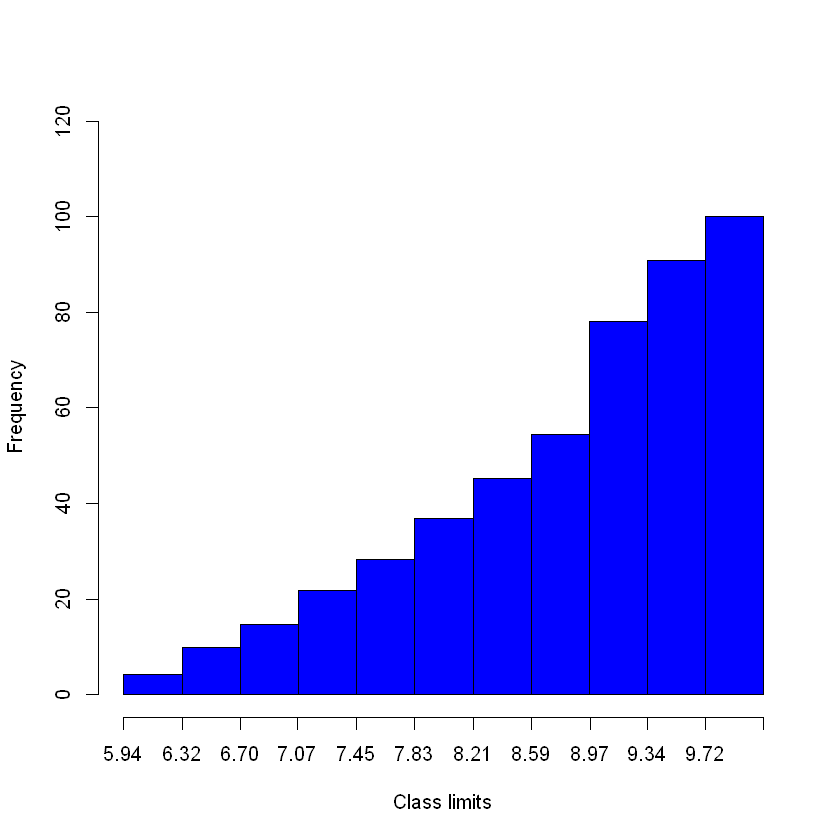

In [16]:
ftable(dataset_mas_limpio$Modalidad)

 Primaria Secundaria
                    
    26704      43937

### Graficos de sectores, primaria y secundaria, para analizar la distribución de estudiantes

### Primaria

In [55]:
sectores<-filter(dataset_mas_limpio, (AñoCursado == "1" |  AñoCursado == "2" |  AñoCursado == "3" |
                     AñoCursado == "4" |  AñoCursado == "5" |  AñoCursado == "6") & Modalidad == "Primaria")

In [60]:
library(ggplot2)
pie_commute <- round(100 * table(sectores$AñoCursado) / length(sectores$AñoCursado))
pie_commute
porc <- c(pie_commute)
frec<- c(table(sectores$AñoCursado))
D1<-data.frame(frec,porc)
D1
Años<-rownames(D1)


 1  2  3  4  5  6 
19 16 16 16 16 17 

frec,porc
5027,19
4225,16
4326,16
4338,16
4169,16
4619,17


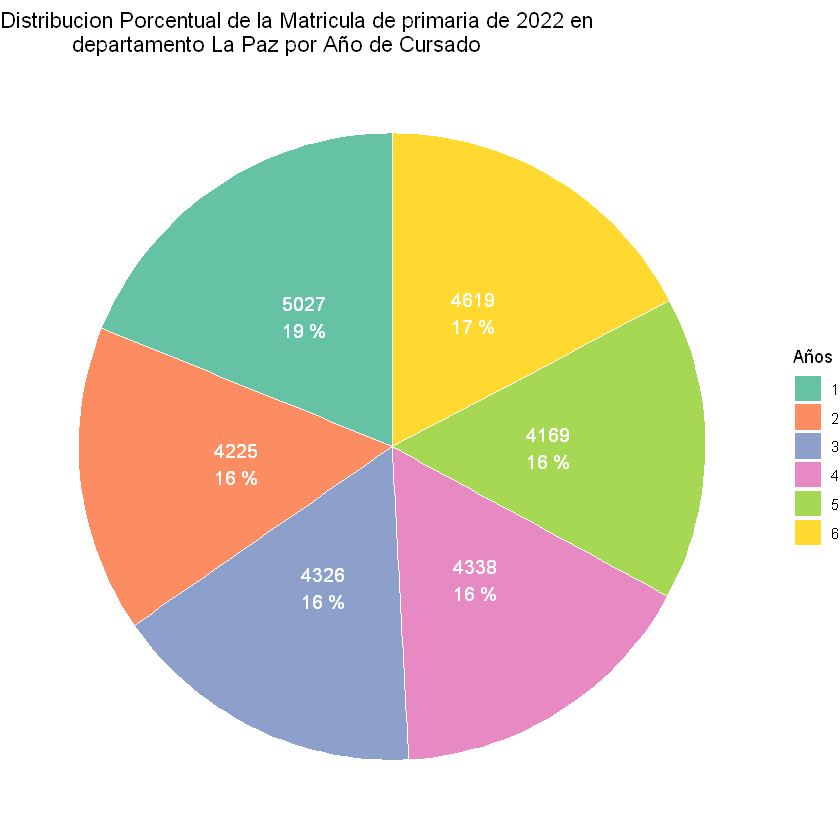

In [61]:
ggplot(D1, aes(x="", y=frec, fill=Años)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
  scale_fill_brewer(palette="Set2")+
  labs(title="Distribucion Porcentual de la Matricula de primaria de 2022 en
            departamento La Paz por Año de Cursado")

### Secundaria

In [62]:
sectores_secu<-filter(dataset_mas_limpio, (AñoCursado == "1" |  AñoCursado == "2" |  AñoCursado == "3" |
                     AñoCursado == "4" |  AñoCursado == "5" |  AñoCursado == "6" | AñoCursado == "7") & Modalidad == "Secundaria")

In [63]:

pie <- round(100 * table(sectores_secu$AñoCursado) / length(sectores_secu$AñoCursado))
pie
porc <- c(pie)
frec<- c(table(sectores_secu$AñoCursado))
D1<-data.frame(frec,porc)
D1
Años<-rownames(D1)


 1  2  3  4  5  6  7 
14 14 15 22 20 15  0 

frec,porc
6227,14
5964,14
6614,15
9794,22
8713,20
6416,15
131,0


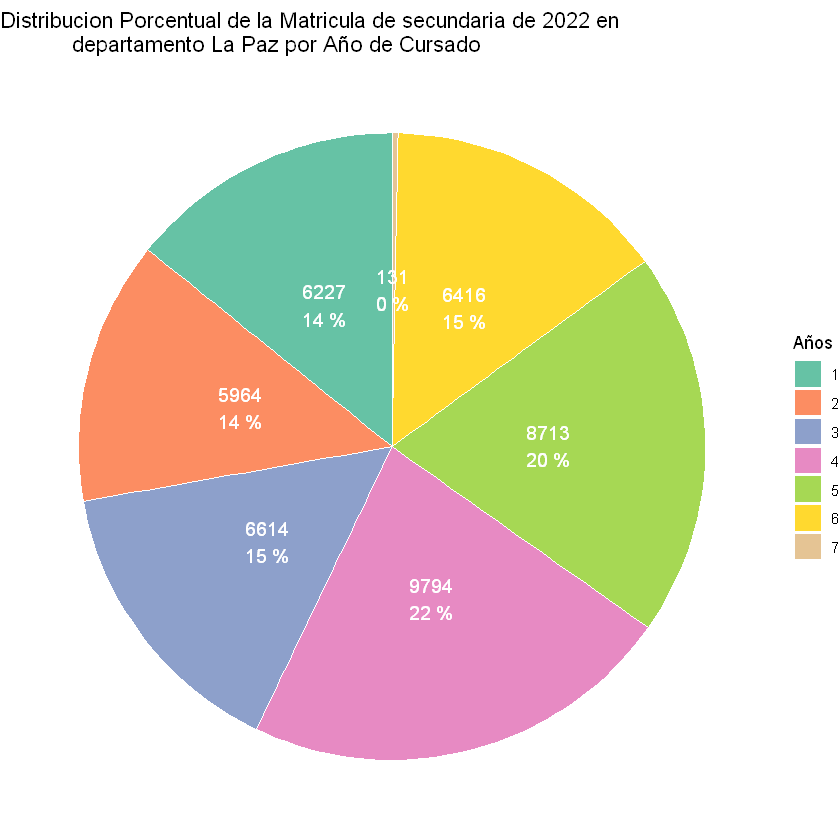

In [64]:
ggplot(D1, aes(x="", y=frec, fill=Años)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
  scale_fill_brewer(palette="Set2")+
  labs(title="Distribucion Porcentual de la Matricula de secundaria de 2022 en
            departamento La Paz por Año de Cursado")

### Distribución por turno 

### Primaria

In [74]:
sector_por_turno_p <- filter(dataset_mas_limpio, Modalidad == 'Primaria')

In [83]:
pie <- round(100 * table(sector_por_turno_p$turno) / length(sector_por_turno_p$turno))
pie
porc <- c(pie)
frec<- c(table(sector_por_turno_p$turno))
D1<-data.frame(frec,porc)
D1
turnos<-rownames(D1)


  COMPLETO INTERMEDIO     MAÑANA   ROTATIVO      TARDE 
         2          0         38          3         57 

,frec,porc
COMPLETO,631,2
INTERMEDIO,10,0
MAÑANA,10016,38
ROTATIVO,785,3
TARDE,15262,57


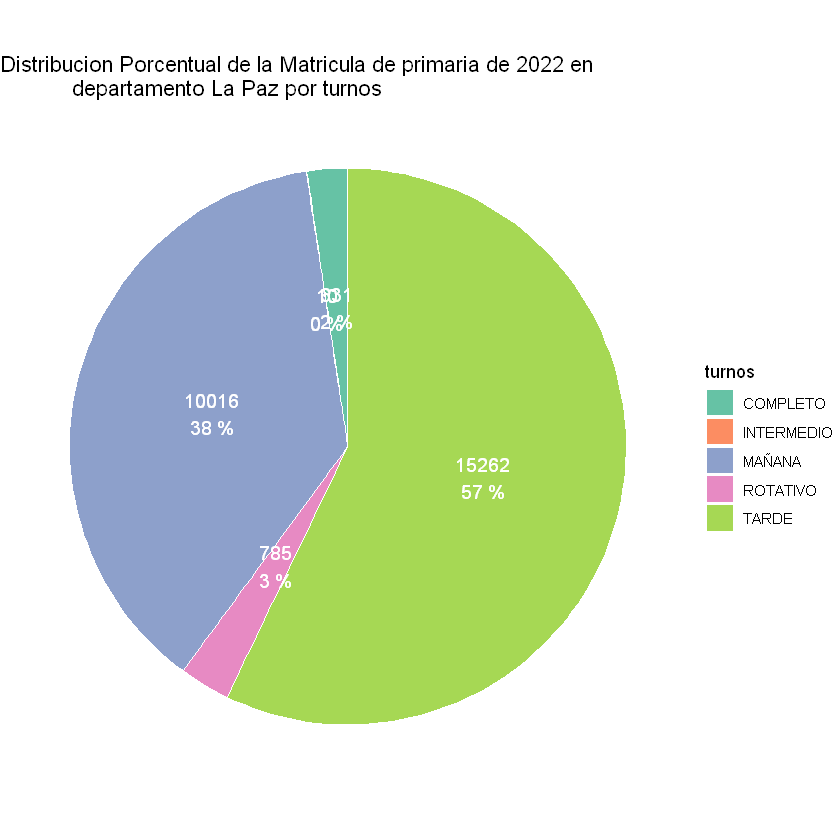

In [84]:
ggplot(D1, aes(x="", y=frec, fill=turnos)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
  scale_fill_brewer(palette="Set2")+
  labs(title="Distribucion Porcentual de la Matricula de primaria de 2022 en
            departamento La Paz por turnos")

### Secundaria

In [87]:
sector_por_turno_s <- filter(dataset_mas_limpio, Modalidad == 'Secundaria')
pie <- round(100 * table(sector_por_turno_s$turno) / length(sector_por_turno_s$turno))
pie
porc <- c(pie)
frec<- c(table(sector_por_turno_s$turno))
D1<-data.frame(frec,porc)
D1
turnos<-rownames(D1)


    DIURNO     MAÑANA      NOCHE   ROTATIVO      TARDE VESPERTINO 
         1         77          0          0         20          0 

,frec,porc
DIURNO,649,1
MAÑANA,34001,77
NOCHE,198,0
ROTATIVO,78,0
TARDE,8927,20
VESPERTINO,84,0


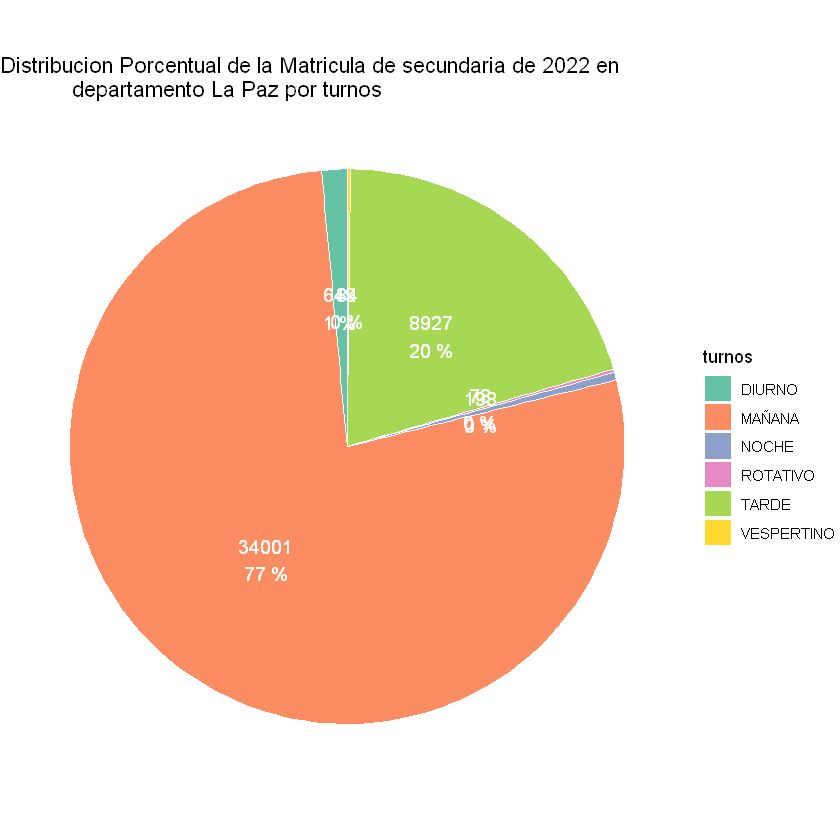

In [88]:
ggplot(D1, aes(x="", y=frec, fill=turnos)) +
  geom_bar(stat="identity", width=1,color="white") +
  coord_polar("y", start=0)+
  theme_void()+
  geom_text(aes(label = paste0(frec,'\n', porc, ' %'),x = 1), color = "white", size=4,
            position = position_stack(vjust = 0.5))+
  scale_fill_brewer(palette="Set2")+
  labs(title="Distribucion Porcentual de la Matricula de secundaria de 2022 en
            departamento La Paz por turnos")

# Distribucion por sector publico y privado

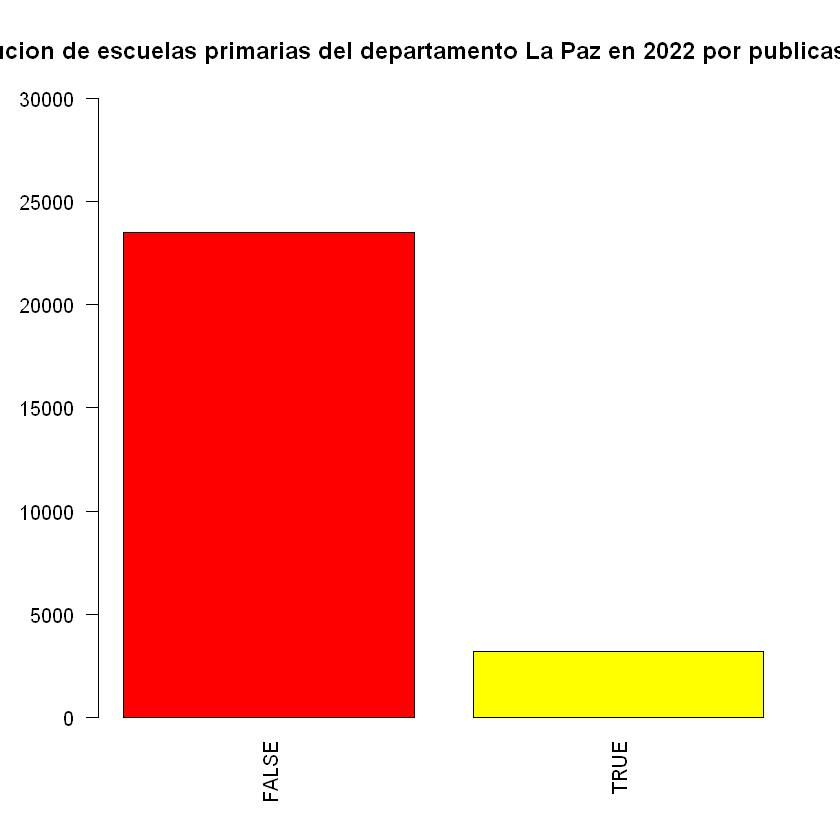

In [107]:
#Gráfico de barras de frecuencia absoluta
escu_primaria <- filter(dataset_mas_limpio,Modalidad == "Primaria")
tabla <- table(escu_primaria$EsPrivada)
barplot(tabla,main="Distribucion de escuelas primarias del departamento La Paz en 2022 por publicas y privadas",col=rainbow(6),ylim=c(0,30000),las=2)

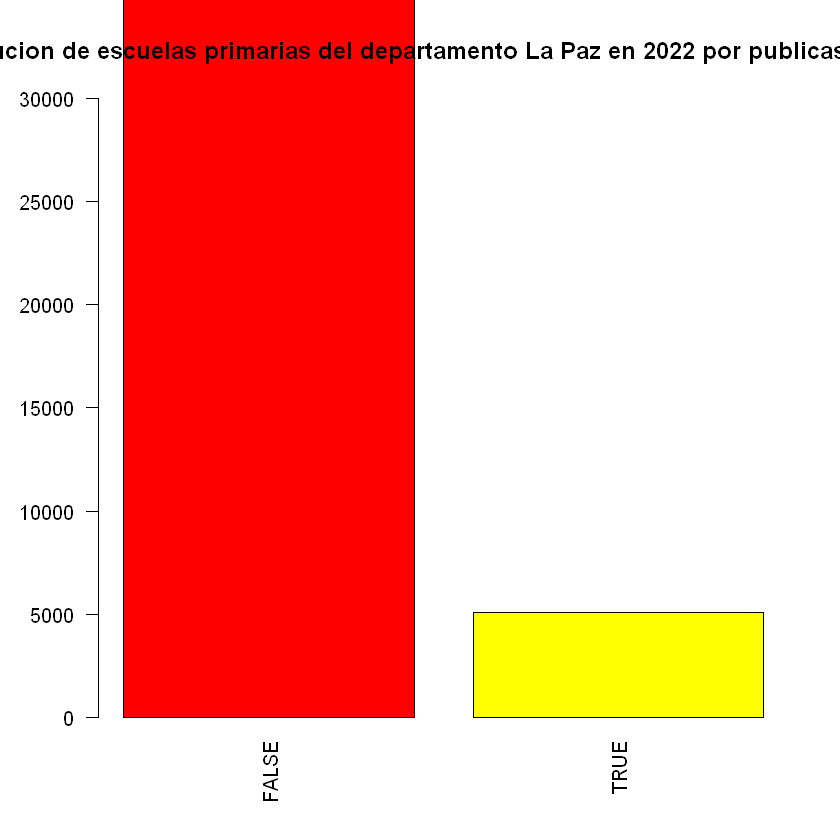

In [108]:
#Gráfico de barras de frecuencia absoluta
escu_primaria <- filter(dataset_mas_limpio,Modalidad == "Secundaria")
tabla <- table(escu_primaria$EsPrivada)
barplot(tabla,main="Distribucion de escuelas primarias del departamento La Paz en 2022 por publicas y privadas",col=rainbow(6),ylim=c(0,30000),las=2)

# Segmentado por nivel,año y materia.De la variable promedio

### Materia matemática, primer año - Primaria

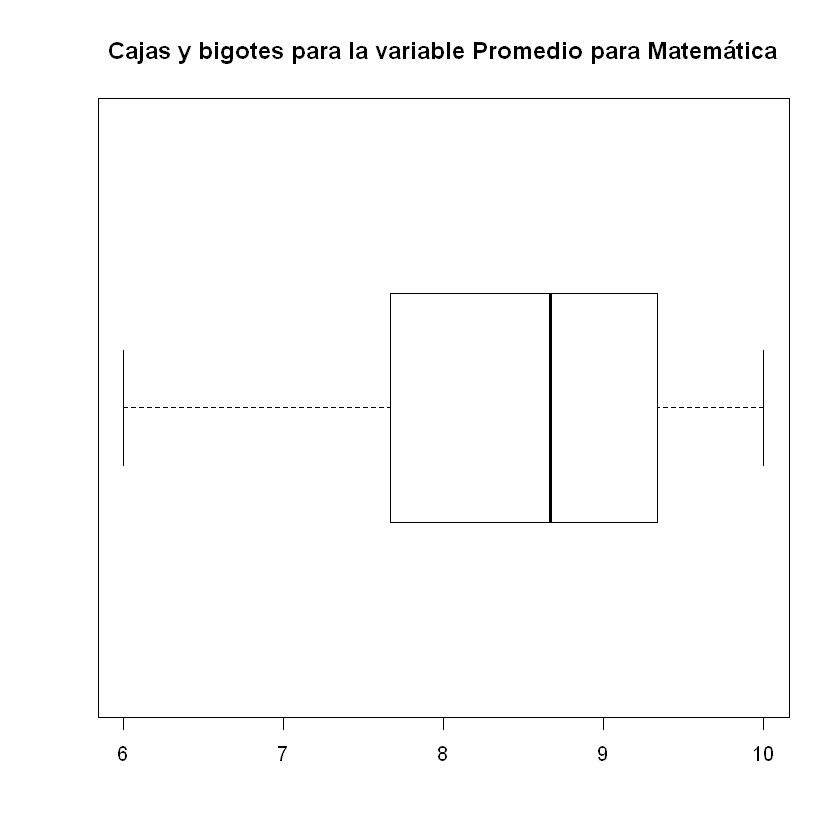

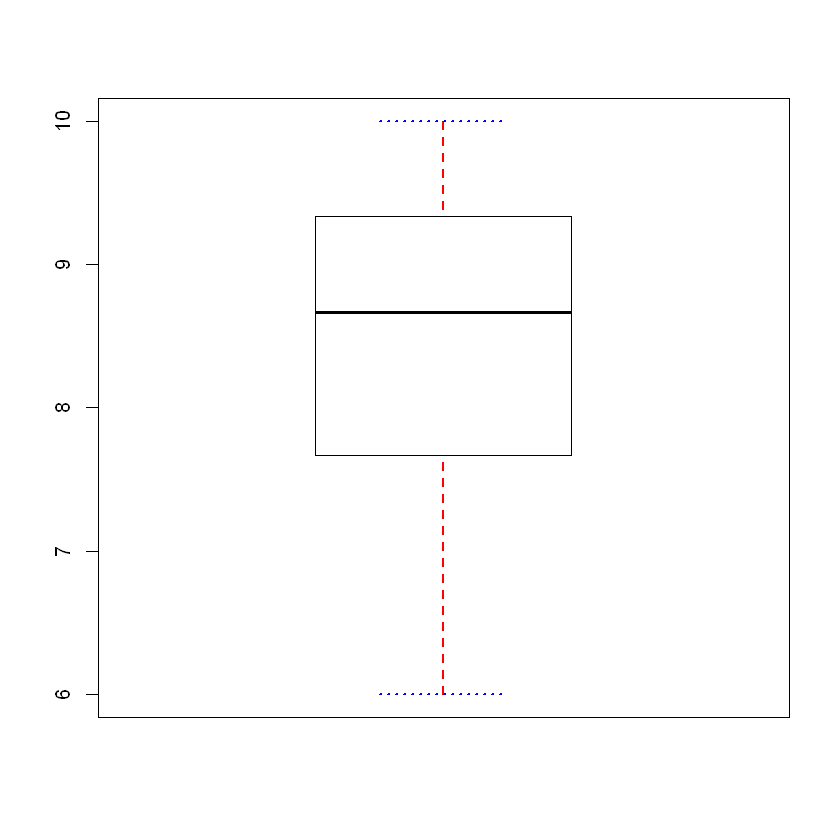

In [24]:
primaria_Mat_1<-filter(dataset_mas_limpio, AñoCursado == "1" & asignatura=="MATEMÁTICA" & Modalidad == "Primaria")
boxplot(primaria_Mat_1[!is.na(primaria_Mat_1$Promedio),]$Promedio, main ="Cajas y bigotes para la variable Promedio para Matemática",horizontal = TRUE)


boxplot(primaria_Mat_1[!is.na(primaria_Mat_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue") # Color barras

### Materia Lengua, primer año - Primaria

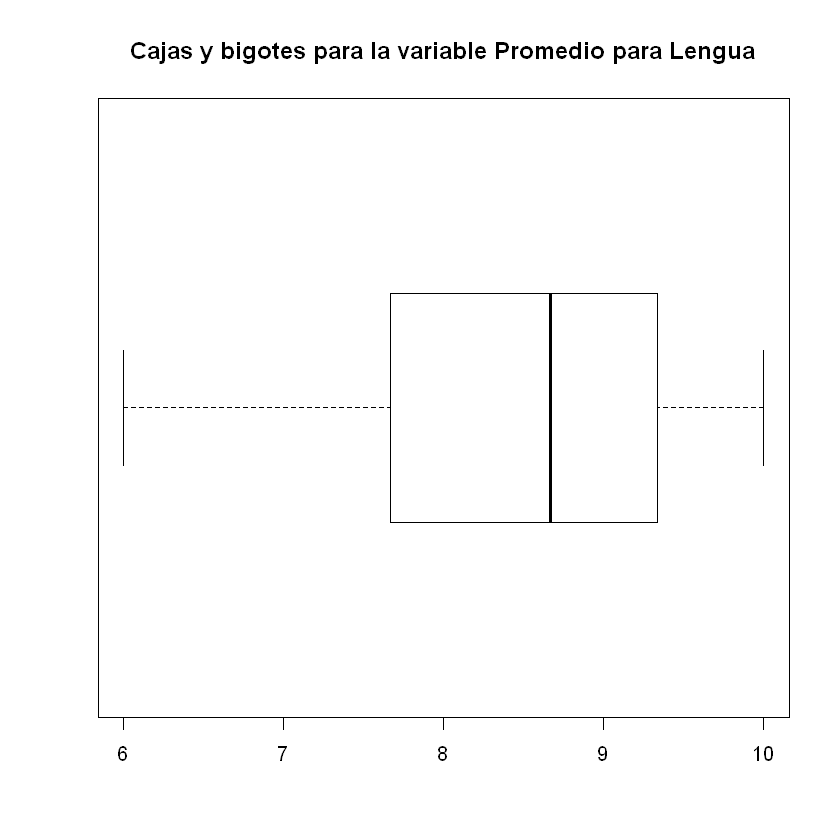

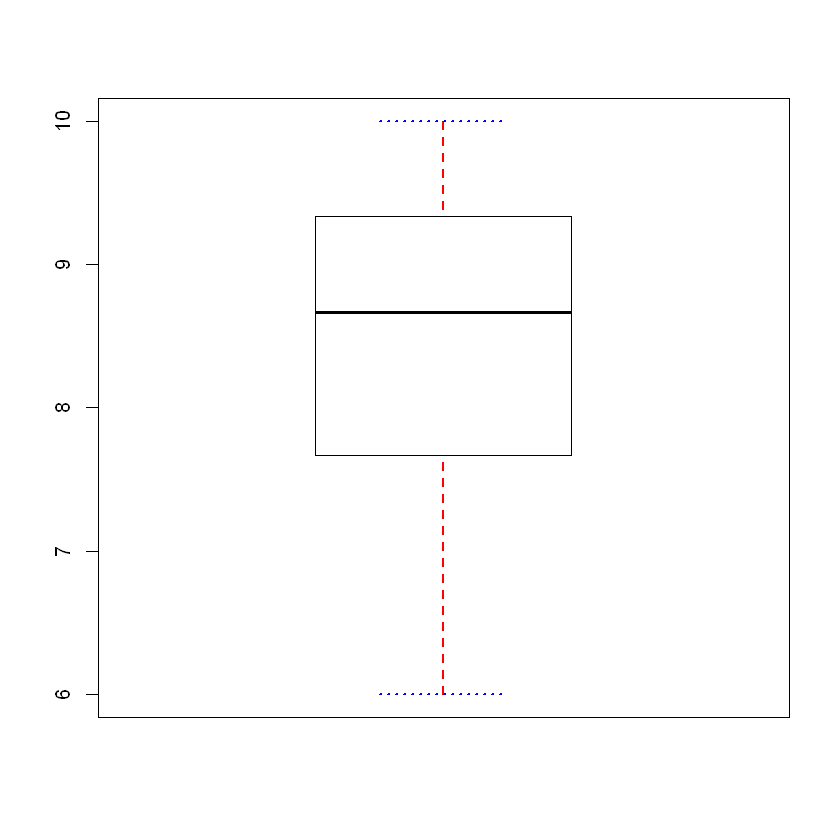

In [25]:
primaria_len_1<-filter(dataset_mas_limpio, AñoCursado == "1" & asignatura=="LENGUA" & Modalidad == "Primaria")
boxplot(primaria_len_1[!is.na(primaria_len_1$Promedio),]$Promedio, main ="Cajas y bigotes para la variable Promedio para Lengua",horizontal = TRUE)


boxplot(primaria_len_1[!is.na(primaria_len_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue") # Color barras

### Materia matemática, primer año - Secundaria



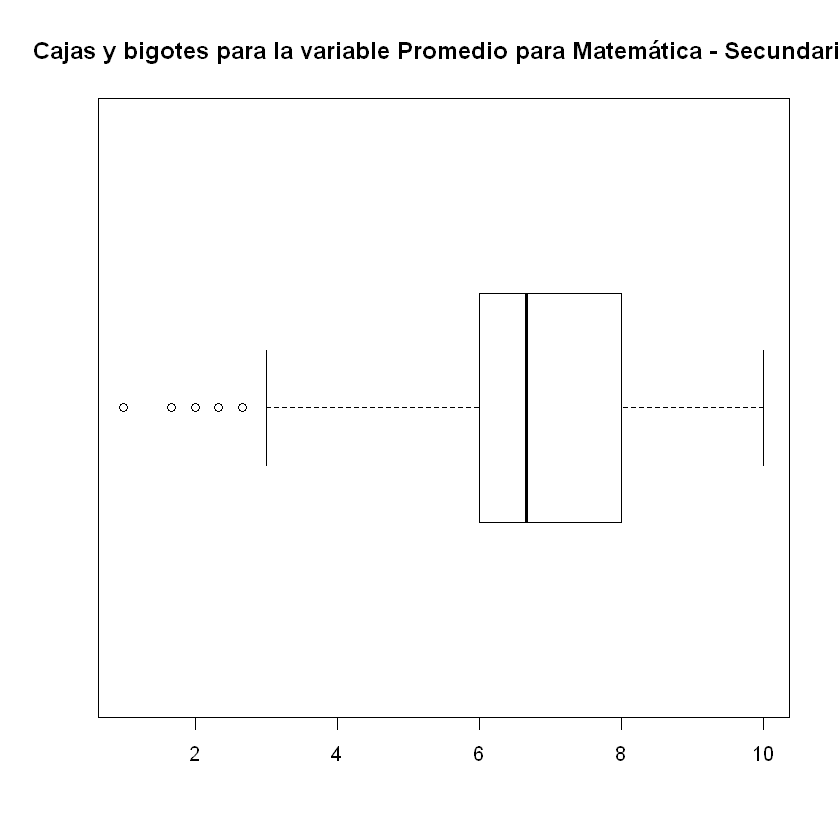

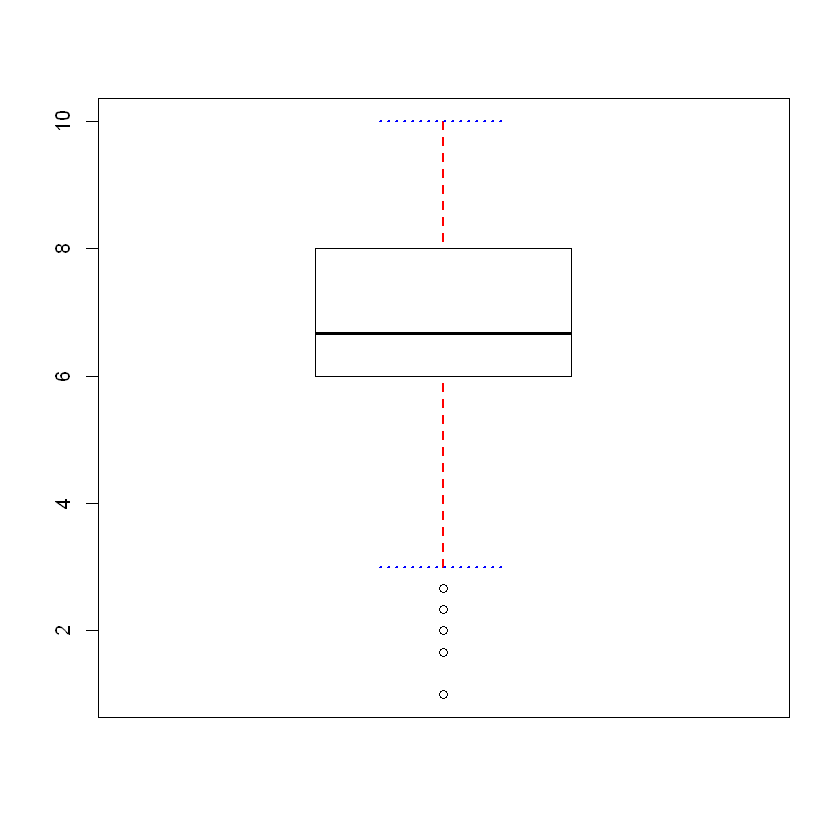

In [26]:
secundaria_Mat_1<-filter(dataset_mas_limpio, AñoCursado == 1 & asignatura=="MATEMATICA" & Modalidad == "Secundaria")
boxplot(secundaria_Mat_1[!is.na(secundaria_Mat_1$Promedio),]$Promedio, main ="Cajas y bigotes para la variable Promedio para Matemática - Secundaria",horizontal = TRUE)


boxplot(secundaria_Mat_1[!is.na(secundaria_Mat_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue") # Color barras

### Materia Lengua y Literatura, primer año - Secundaria

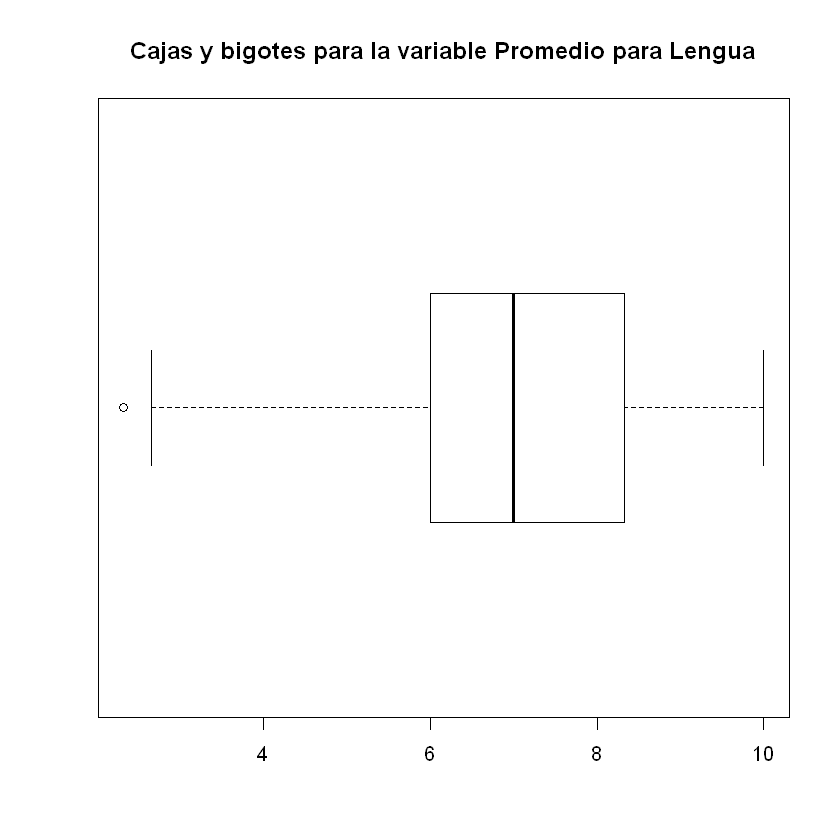

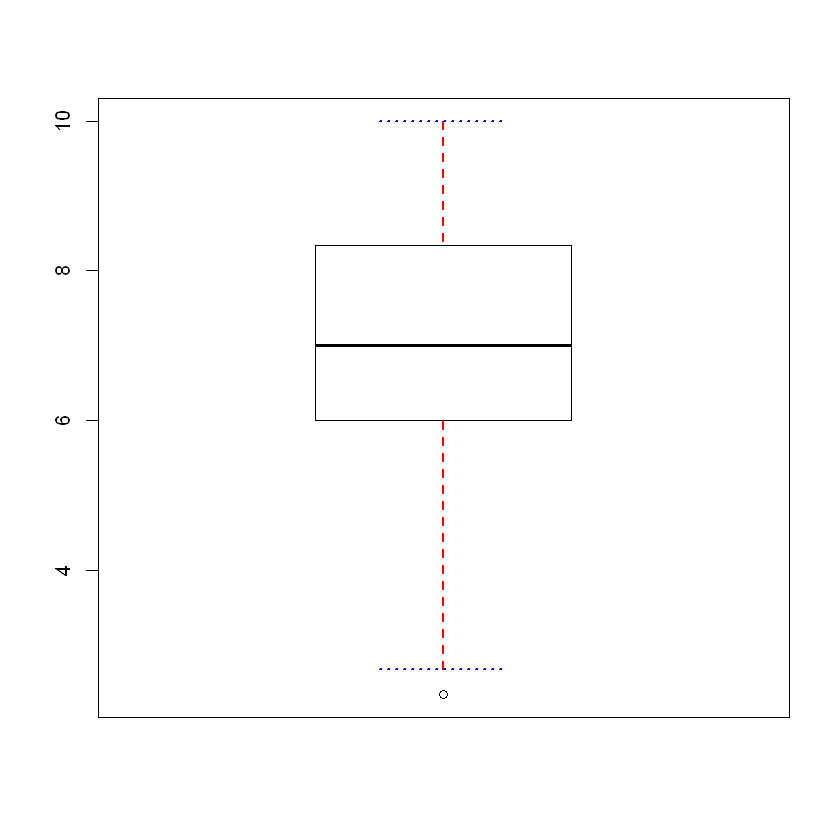

In [27]:
secundaria_len_1<-filter(dataset_mas_limpio, AñoCursado == "1" & asignatura=="LENGUA Y LITERATURA" & Modalidad == "Secundaria")
boxplot(secundaria_len_1[!is.na(secundaria_len_1$Promedio),]$Promedio, main ="Cajas y bigotes para la variable Promedio para Lengua",horizontal = TRUE)


boxplot(secundaria_len_1[!is.na(secundaria_len_1$Promedio),]$Promedio,
        whisklty = 2,       # Tipo línea bigotes
        whisklwd = 2,       # Ancho línea bigotes
        whiskcol = "red",   # Color bigotes
        staplelty = 3,      # Tipo línea barras
        staplelwd = 2,      # Ancho línea barras
        staplecol = "blue") # Color barras

## Histogramas segmentados por nivel,año y materia de la variable promedio para matemática y lengua de primer año

### Primaria - primer año
### Materia: matemática

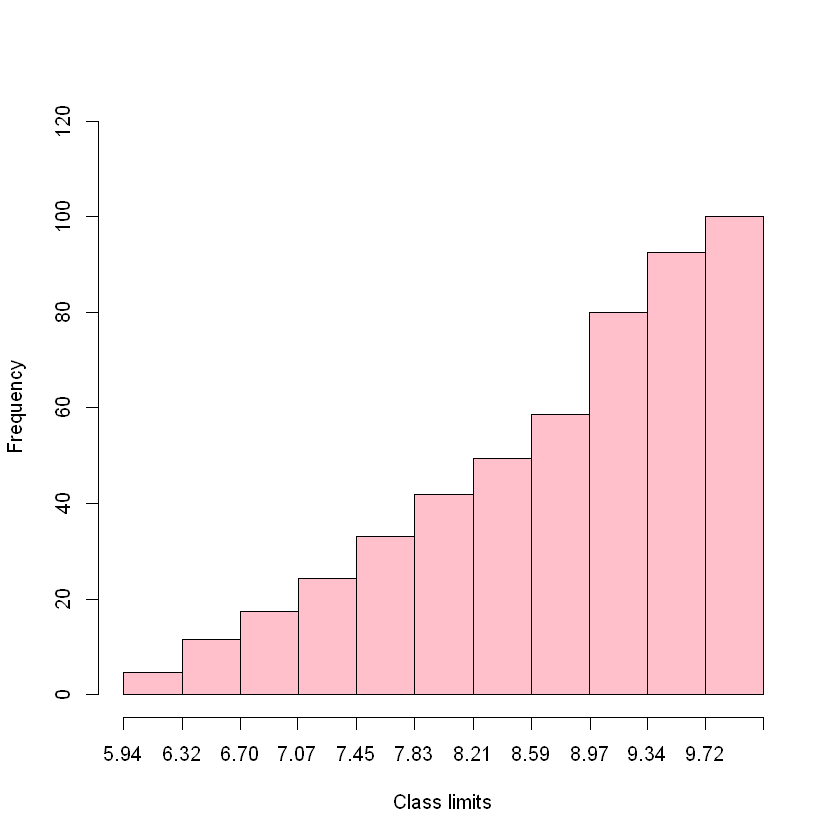

In [111]:
primaria_mat <- filter(dataset_mas_limpio, AñoCursado == "1" & asignatura == "MATEMÁTICA" & Modalidad == 'Primaria')
histo_p_1 <- fdt(primaria_mat$Promedio,breaks="Sturges",na.rm=TRUE)
plot(histo_mat_pri_1, type="cfph", col="pink")

### Primaria - primer año
### Materia: Lengua

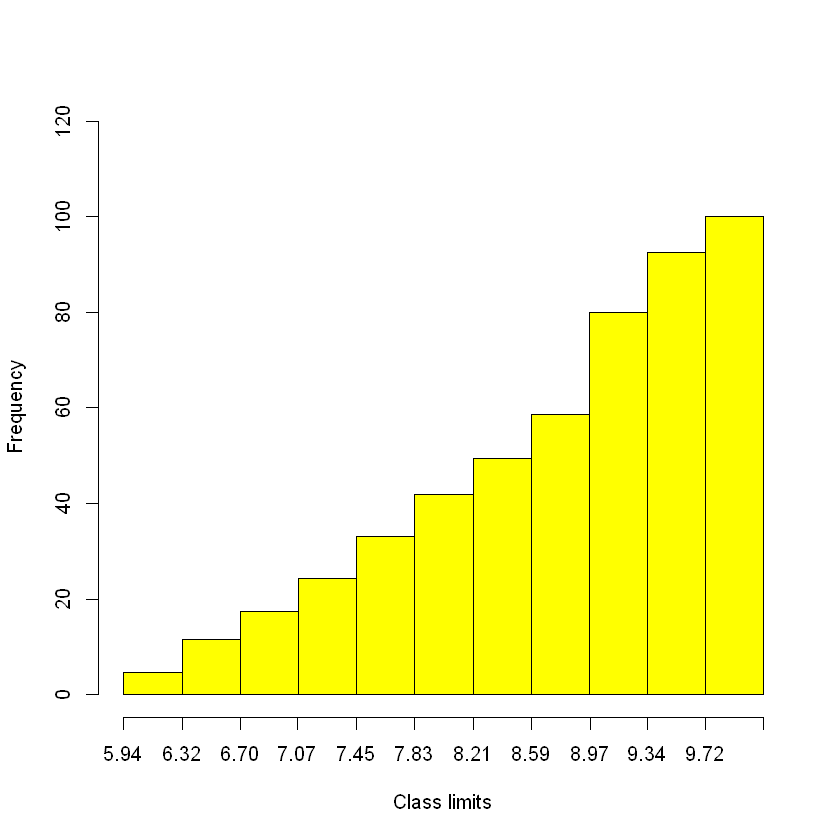

In [114]:
primaria_l <- filter(dataset_mas_limpio, AñoCursado == "1" & asignatura == "LENGUA" & Modalidad == 'Primaria')
histo_p_2 <- fdt(primaria_l$Promedio,breaks="Sturges",na.rm=TRUE)
plot(histo_mat_pri_1, type="cfph", col="yellow")

### Secundaria - primer año
### Materia: matemática

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


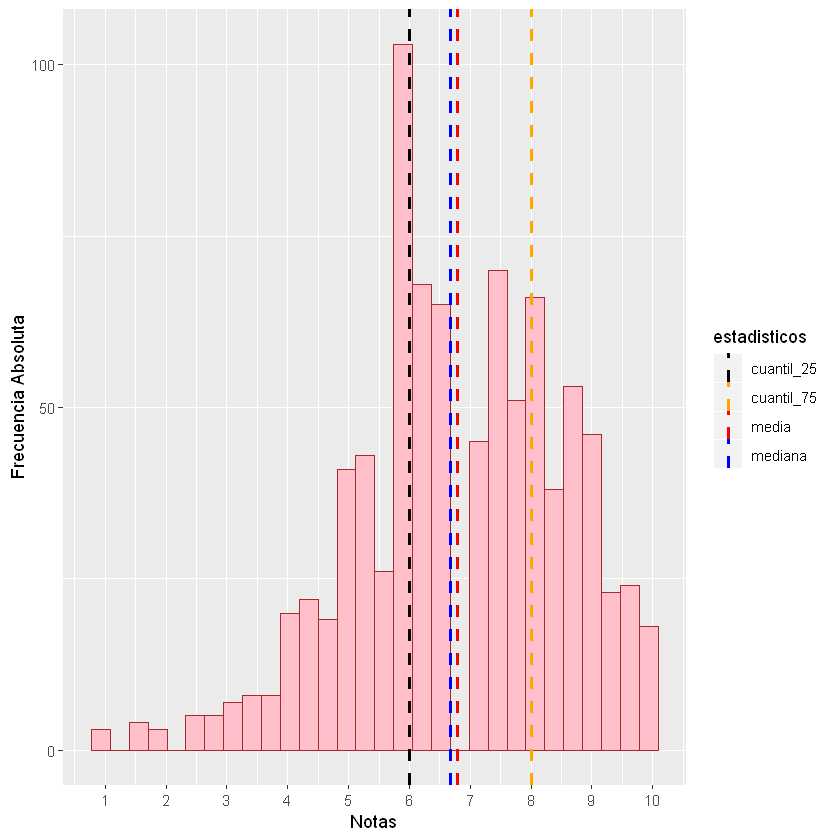

In [115]:
secundaria_mat<- filter(dataset_mas_limpio, AñoCursado == "1" & asignatura == "MATEMATICA" & Modalidad == 'Secundaria')
histo_s_1 <- fdt(secundaria_mat$Promedio,breaks="Sturges",na.rm=TRUE)
ggplot(secundaria_mat[!is.na(secundaria_mat$Promedio),],aes(x= Promedio))+
    geom_histogram(fill="pink",colour="brown",name="matemática")+
        scale_y_continuous(breaks = seq(0, 500,50), name = "Frecuencia Absoluta") +
  scale_x_continuous(breaks = seq(0,10,1), name = "Notas" ) + geom_vline(aes(xintercept = median(Promedio),
                  color = "mediana"),
              linetype = "dashed",
              size = 1) +
   geom_vline(aes(xintercept = mean(Promedio),
                  color = "media"),
              linetype = "dashed",
              size = 1) +
   geom_vline(
     aes(xintercept = quantile(Promedio, 0.25),
         color = "cuantil_25"),
     linetype = "dashed",
     size = 1
   ) +
   geom_vline(
     aes(xintercept = quantile(Promedio, 0.75),
         color = "cuantil_75"),
     linetype = "dashed",
     size = 1
   )  +
   scale_color_manual(
     name = "estadisticos",
     values = c(
       mediana = "blue",
       media = "red",
       cuantil_25 = "black",
       cuantil_75 = "orange"
     )
   ) +
   xlab("Longitud") + ylab("n")

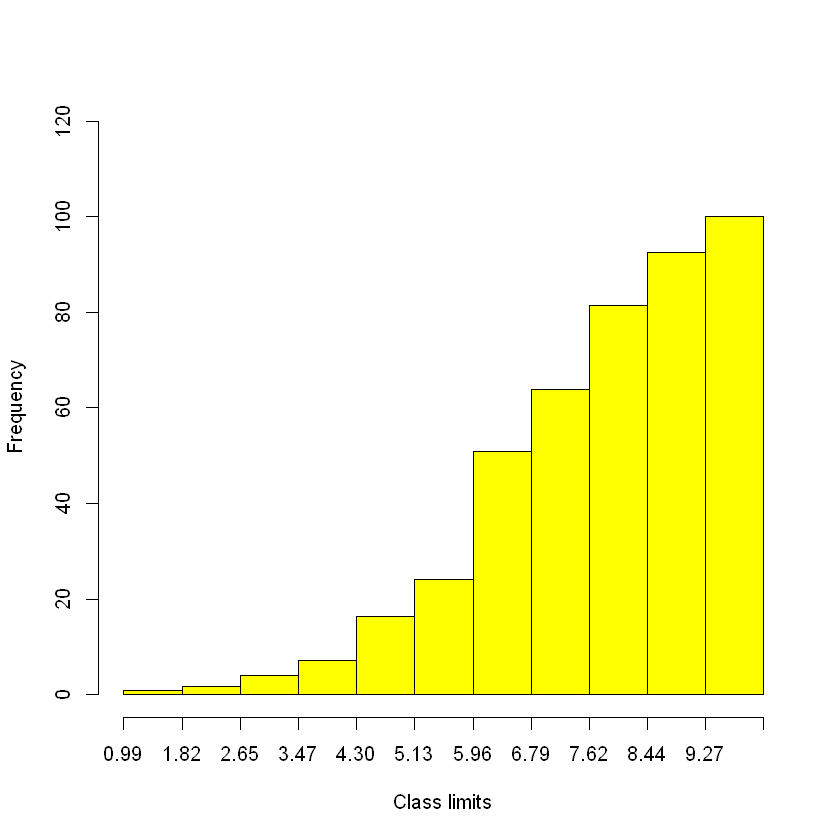

In [116]:
plot(histo_s_1, type="cfph", col="yellow")

### Secundaria - primer año
### Materia: Lengua y literatura

In [119]:
secundaria_l<- filter(dataset_mas_limpio, AñoCursado == "1" & asignatura == "LENGUA Y LITERATURA" & Modalidad == 'Secundaria')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


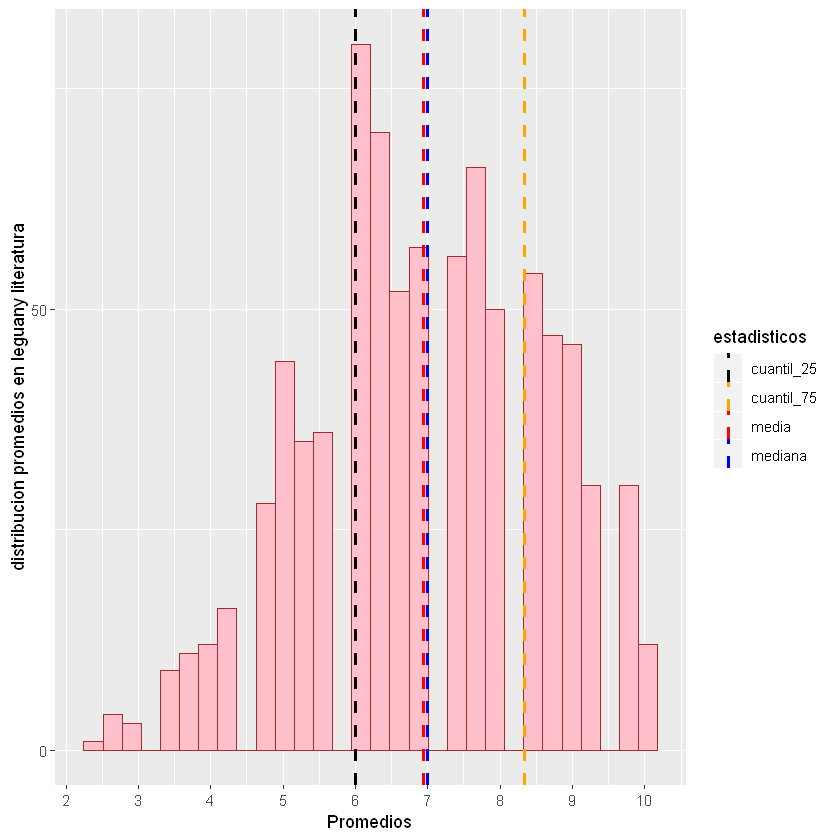

In [122]:

histo_s_2 <- fdt(secundaria_l$Promedio,breaks="Sturges",na.rm=TRUE)
ggplot(secundaria_l[!is.na(secundaria_l$Promedio),],aes(x= Promedio))+
    geom_histogram(fill="pink",colour="brown",name="legua y literatura")+
        scale_y_continuous(breaks = seq(0, 500,50), name = "distribucion promedios en leguany literatura") +
  scale_x_continuous(breaks = seq(0,10,1), name = "Promedios" ) + geom_vline(aes(xintercept = median(Promedio),
                  color = "mediana"),
              linetype = "dashed",
              size = 1) +
   geom_vline(aes(xintercept = mean(Promedio),
                  color = "media"),
              linetype = "dashed",
              size = 1) +
   geom_vline(
     aes(xintercept = quantile(Promedio, 0.25),
         color = "cuantil_25"),
     linetype = "dashed",
     size = 1
   ) +
   geom_vline(
     aes(xintercept = quantile(Promedio, 0.75),
         color = "cuantil_75"),
     linetype = "dashed",
     size = 1
   )  +
   scale_color_manual(
     name = "estadisticos",
     values = c(
       mediana = "blue",
       media = "red",
       cuantil_25 = "black",
       cuantil_75 = "orange"
     )
   ) +
   xlab("Longitud") + ylab("n")

## Hacer los mismos histogramas para mat y len para el resto de los años

## Guía 4

### a. ¿Son las correlaciones iguales?
### b. A partir de lo que vimos en teoría, 
### ¿usted podría informar todas las correlaciones comocorrelaciones lineales fuertes?
### c. ¿Qué importancia tiene el graficar los datos?

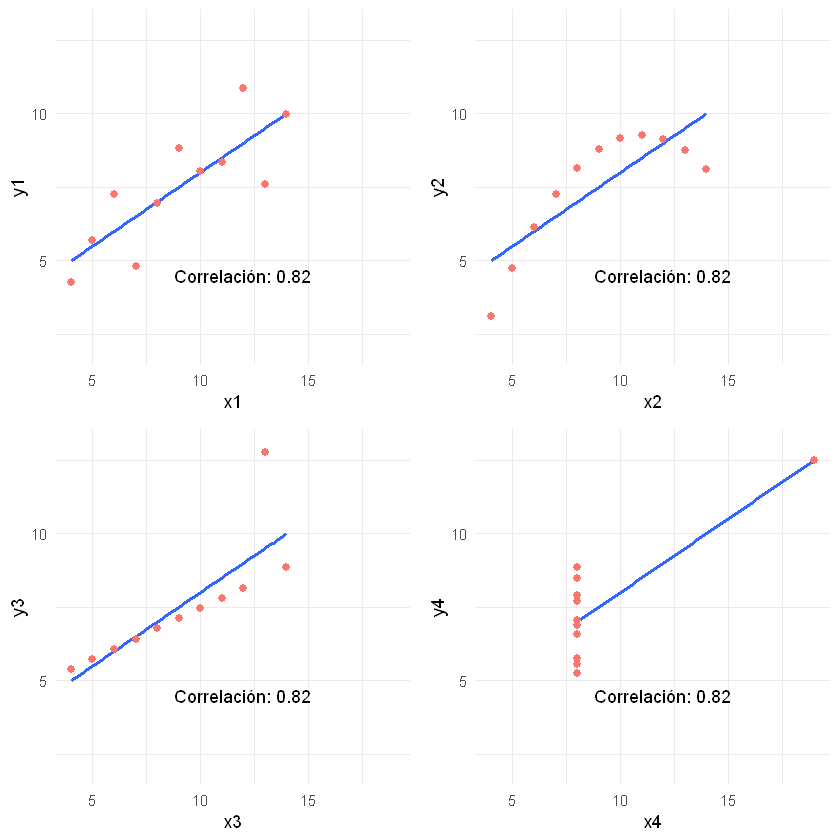

In [127]:
library(dplyr)
library(gridExtra)
anscombe_data = read.delim(file="https://goo.gl/mVLz5L", header = T)
# Calcular la correlación
cor_1 = cor(anscombe_data$x1, anscombe_data$y1)
cor_2 = cor(anscombe_data$x2, anscombe_data$y2)
cor_3 = cor(anscombe_data$x3, anscombe_data$y3)
cor_4 = cor(anscombe_data$x4, anscombe_data$y4)
# Definir la función
plot_anscombe <- function(x, y, value, type)
{ # 'anscombe_data' es una variable global, esto es
# una mala práctica de programación ;)
p=ggplot(anscombe_data, aes_string(x,y)) +
geom_smooth(method='lm', fill=NA) +
geom_point(aes(colour=factor(1),
fill = factor(1)),
shape=21, size = 2
) +
ylim(2, 13) +
xlim(4, 19) +
theme_minimal() +
theme(legend.position="none") +
annotate("text",
x = 12,
y =4.5,
label =
sprintf("%s: %s",
type,
round(value,2)
)
)
return(p)
}
# Graficar en una cuadrícula de 2x2
grid.arrange(plot_anscombe("x1", "y1", cor_1, "Correlación"),
plot_anscombe("x2", "y2", cor_2, "Correlación"),
plot_anscombe("x3", "y3", cor_3, "Correlación"),
plot_anscombe("x4", "y4", cor_4, "Correlación"),
ncol=2, nrow=2)


## Punto 4
### Comparación mediante histograma

### Secundaria - primer año

In [131]:
secundarsecundaria_Mat_1<-filter(dataset_mas_limpio, AñoCursado == 1 & asignatura=="MATEMATICA" & Modalidad == "Secundaria")

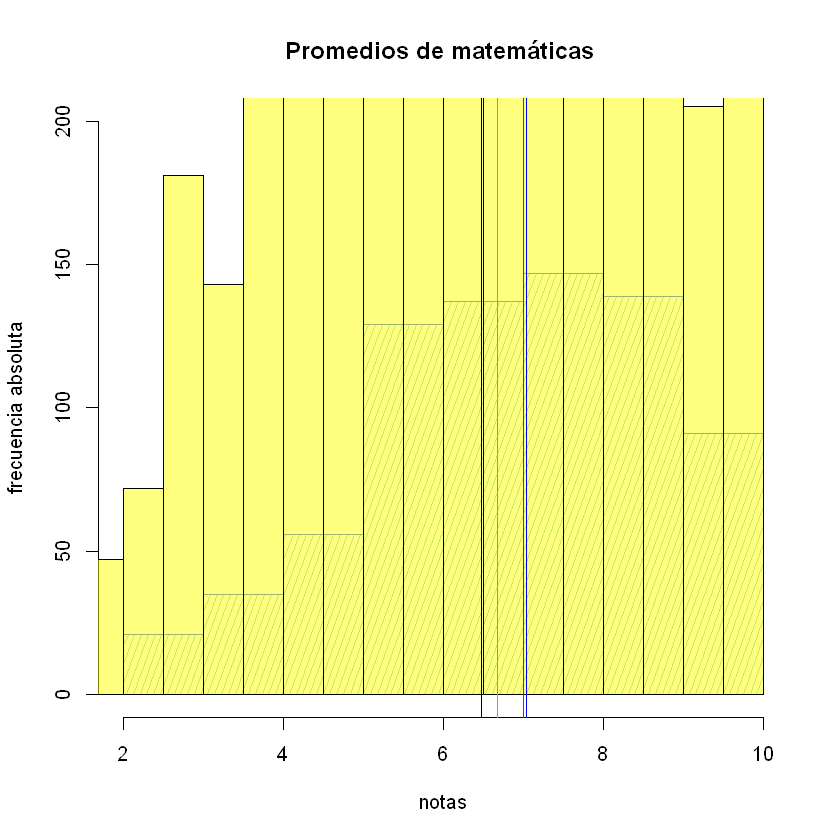

In [132]:
#Comparación bivariada usando Histogramas Superpuestos

x <- filter(secundaria_Mat_1,EsPrivada==TRUE)$Promedio # Primer grupo
y <- filter(secundaria_Mat_1,EsPrivada==FALSE)$Promedio
hist(x, col="paleturquoise3",border="royalblue",breaks = "Sturges", ylim = c(0, 200),
     density=20,angle=70, xlab="notas", ylab="frecuencia absoluta", main="Promedios de matemáticas ")
hist(y, add = TRUE, col = rgb(1, 1, 0, alpha = 0.5))

mean_x <- mean(x,na.rm=TRUE)     
med_x <- median(x,na.rm=TRUE)   
mean_y <- mean(y,na.rm=TRUE)     
med_y <- median(y,na.rm=TRUE)   
abline(v = mean_x, col = 'blue')
abline(v = med_x, col = 'red')
abline(v = mean_y, col = 'black')
abline(v = med_y, col = 'green')

### Comparación mediante Boxplot

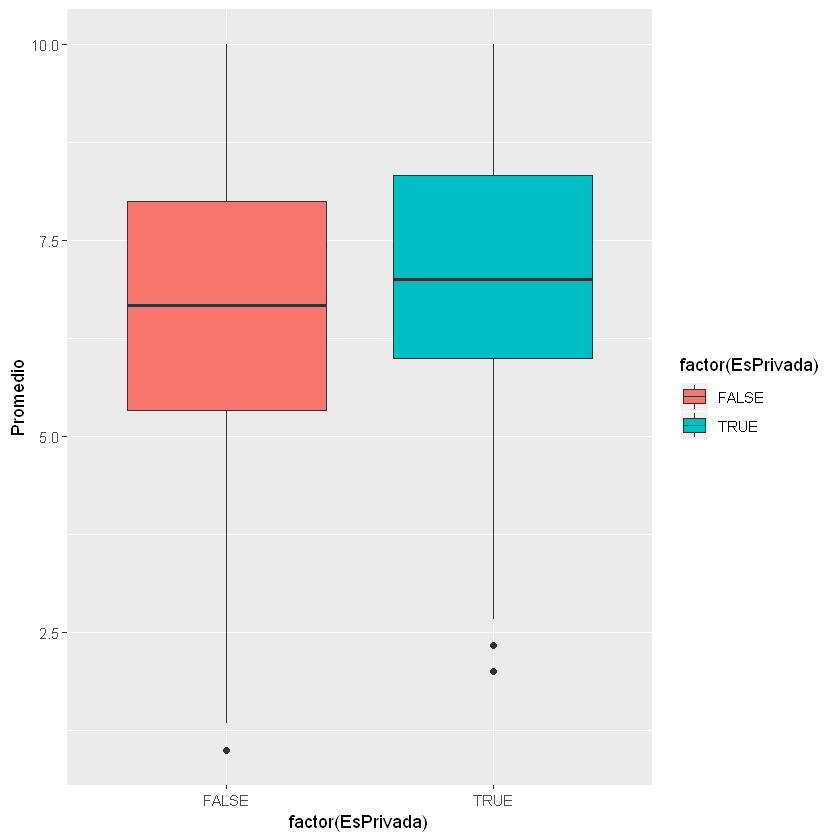

In [133]:
g2 <- ggplot(secundaria_Mat_1, aes(factor(EsPrivada), Promedio))
g2 + geom_boxplot(aes(fill = factor(EsPrivada)))

## Completar para el resto de los años

## Punto 5

### Comparación de promedios de matemáticas de los diferentes años en distintos turnos

### Primaria

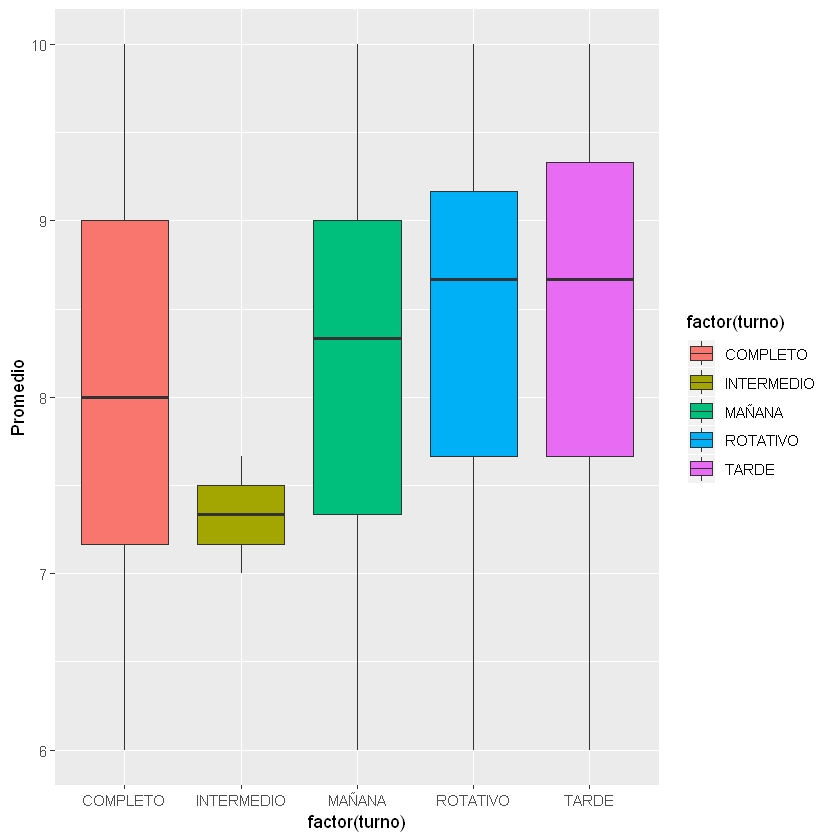

In [135]:
g2 <- ggplot(filter(dataset_mas_limpio,asignatura=="MATEMÁTICA" & Modalidad=='Primaria'),aes(factor(turno),Promedio))
g2 + geom_boxplot(aes(fill = factor(turno)))

### Secundaria

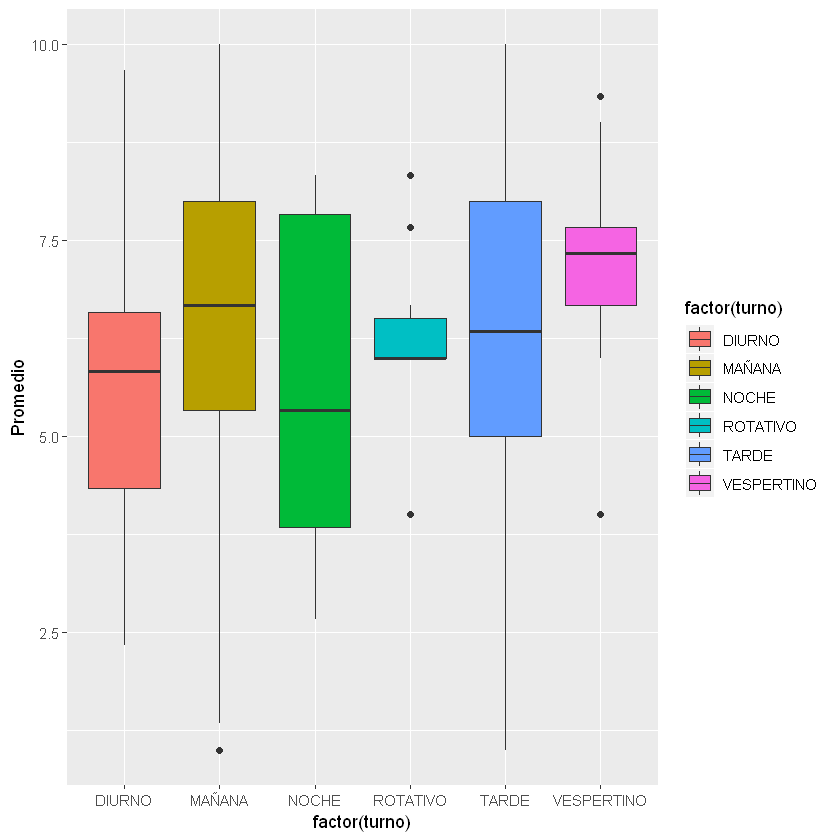

In [137]:
g2 <- ggplot(filter(dataset_mas_limpio,asignatura=="MATEMATICA" & Modalidad=='Secundaria'),aes(factor(turno),Promedio))
g2 + geom_boxplot(aes(fill = factor(turno)))

## Punto 6

[1] 887   3

[1] 862   3

Documento,Prom_Mat,EsPrivada,Prom_Bio,EsPrivada.y
34680594,4.666667,FALSE,5.333333,FALSE
46082290,6.666667,FALSE,6.333333,FALSE
46520307,4.000000,FALSE,7.000000,FALSE
46520314,2.000000,FALSE,3.333333,FALSE
46778660,3.000000,FALSE,5.333333,FALSE
46778660,4.000000,FALSE,5.333333,FALSE


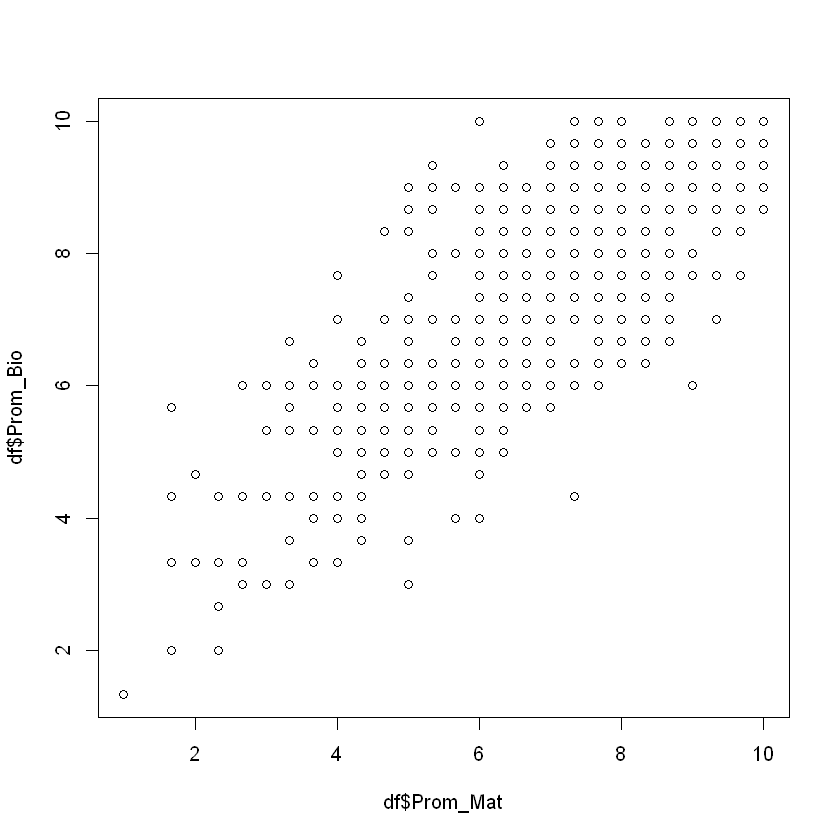

In [30]:
#diagrama de dispersión
#deben tener misma dimension
rm(df)
dim(dplyr::select(secundaria_Mat_1,"Documento","Promedio","EsPrivada"))
dim(dplyr::select(filter(dataset_mas_limpio,asignatura=="BIOLOGIA" & AñoCursado== 1),"Documento","Promedio","EsPrivada"))
df<- dplyr::select(secundaria_Mat_1,"Documento","Promedio","EsPrivada") %>% inner_join(dplyr::select(filter(dataset_mas_limpio,asignatura=="BIOLOGIA" & AñoCursado== 1),"Documento","Promedio","EsPrivada"),by="Documento")
df<-rename(df,Prom_Mat=Promedio.x, Prom_Bio=Promedio.y,EsPrivada=EsPrivada.x)
head(df)
plot(df$Prom_Mat, df$Prom_Bio)

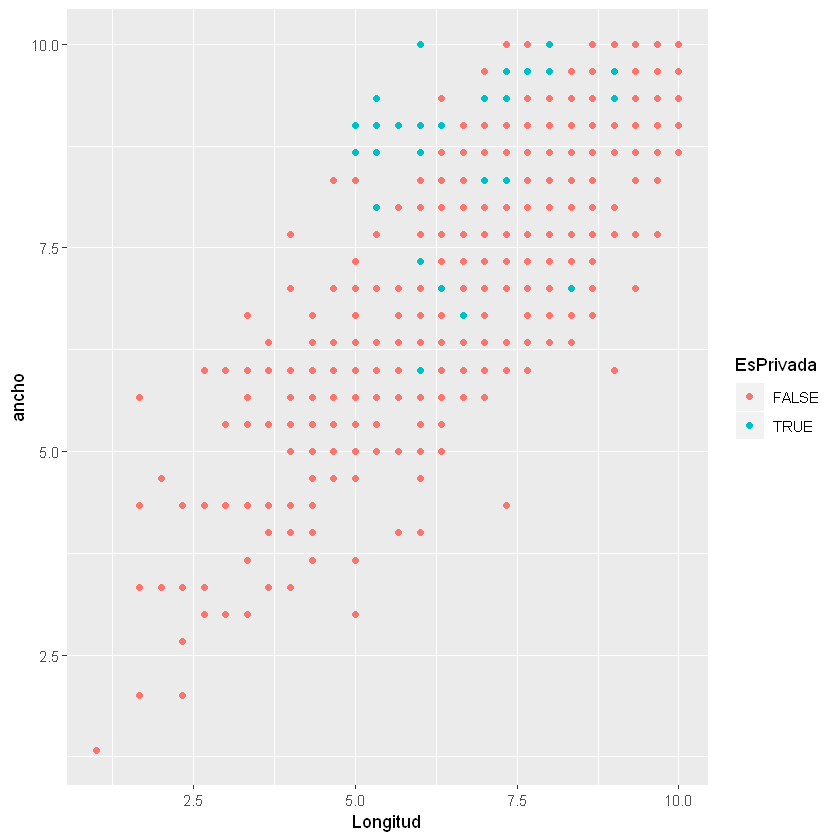

In [31]:
ggplot(data=df, aes(x=Prom_Mat,y=Prom_Bio))+geom_point(aes(colour=EsPrivada)
)+xlab("Longitud")+ylab("ancho")

## Punto 7

## Punto 8

## Punto 9

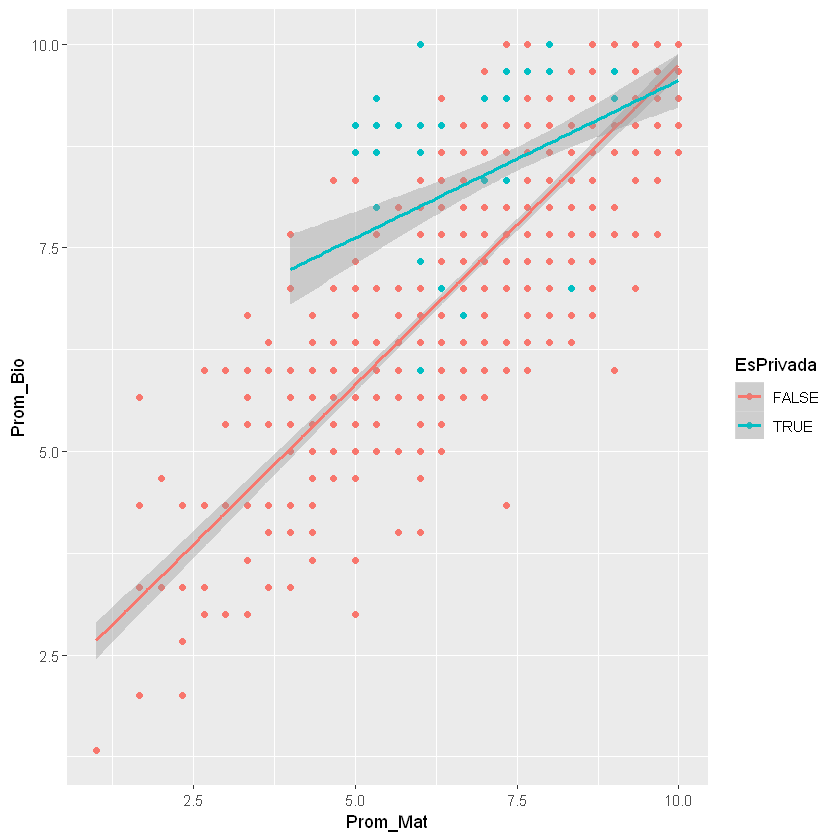

In [32]:
ggplot(data=df, aes(x=Prom_Mat,y=Prom_Bio, color = EsPrivada))+geom_point()+ 
       geom_smooth(method = "lm")

In [33]:
dataM <- na.omit(data.frame(df$Prom_Mat, df$Prom_Bio)) 
dataM<-rename(dataM,Prom_Mat=df.Prom_Mat, Prom_Bio=df.Prom_Bio)
var(dataM)

,Prom_Mat,Prom_Bio
Prom_Mat,2.929701,2.290467
Prom_Bio,2.290467,2.763261


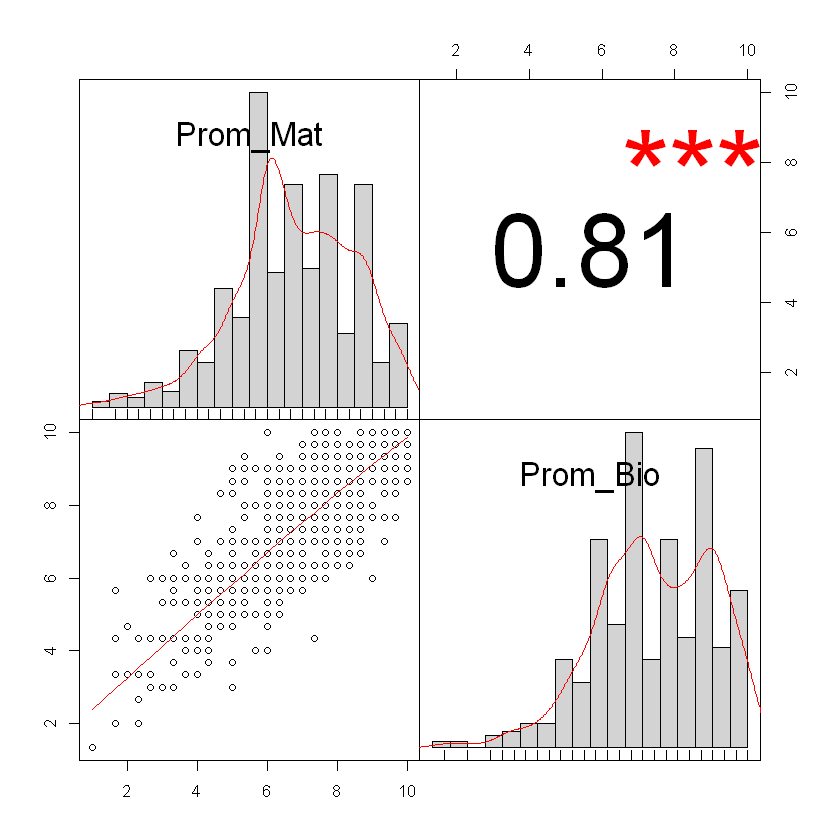

In [138]:
library("PerformanceAnalytics")
chart.Correlation(dataM, histogram = TRUE, method = "pearson")

In [35]:
#menos de 50 datos
shapiro.test(dataM$Prom_Mat)


	Shapiro-Wilk normality test

data:  dataM$Prom_Mat
W = 0.978, p-value = 1.866e-10


In [36]:
#conda install -c conda-forge r-nortest
#mas de 50 datos
library(nortest)
lillie.test(x = dataM$Prom_Mat)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dataM$Prom_Mat
D = 0.088996, p-value < 2.2e-16


In [37]:
per <- cor(dataM$Prom_Mat, dataM$Prom_Bio, method = "pearson")
ken <- cor(dataM$Prom_Mat, dataM$Prom_Bio, method = "kendall")
spe <- cor(dataM$Prom_Mat, dataM$Prom_Bio, method = "spearman")

data <- data.frame(name=c("pearson","kendall","spearman") , value=c(per,ken,spe))

data

name,value
pearson,0.8050104
kendall,0.6298612
spearman,0.7804692


corrplot 0.88 loaded


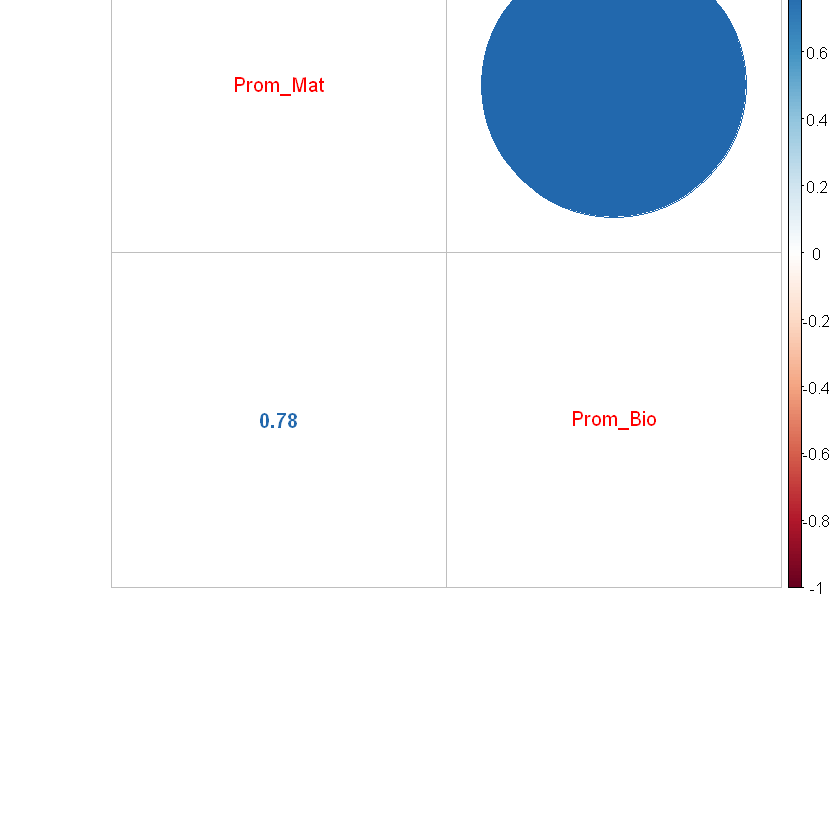

In [38]:
library(corrplot)
corrplot.mixed(cor(dataM, method = "spearman"),addshade="all")

In [39]:
df2<-dplyr::select(secundaria_len_1,"Documento","Promedio","EsPrivada")

df<- df %>% inner_join(df2,by="Documento")

In [40]:

dataN <-rename(df,Prom_Len=Promedio)
dataN <- na.omit(dataN) 
dataN <-dplyr::select(dataN,Prom_Mat,Prom_Bio,Prom_Len)
dim(dataN)
head(dataN)

[1] 1148    3

Prom_Mat,Prom_Bio,Prom_Len
4.666667,5.333333,5.000000
6.666667,6.333333,5.333333
4.000000,7.000000,6.000000
2.000000,3.333333,3.666667
3.000000,5.333333,5.333333
3.000000,5.333333,5.333333


In [41]:
library(ppcor)
pcor(dataM, method = c("spearman"))

Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



,Prom_Mat,Prom_Bio
Prom_Mat,1.0000000,0.7804692
Prom_Bio,0.7804692,1.0000000
,Prom_Mat,Prom_Bio
Prom_Mat,0.000000e+00,1.344724e-186
Prom_Bio,1.344724e-186,0.000000e+00
,Prom_Mat,Prom_Bio
Prom_Mat,0.00000,37.53401
Prom_Bio,37.53401,0.00000


In [42]:
pcor(dataN, method = c("pearson"))

,Prom_Mat,Prom_Bio,Prom_Len
Prom_Mat,1.0000000,0.3925601,0.4261180
Prom_Bio,0.3925601,1.0000000,0.5293377
Prom_Len,0.4261180,0.5293377,1.0000000
,Prom_Mat,Prom_Bio,Prom_Len
Prom_Mat,0.000000e+00,1.464285e-43,8.339908e-52
Prom_Bio,1.464285e-43,0.000000e+00,7.981070e-84
Prom_Len,8.339908e-52,7.981070e-84,0.000000e+00
,Prom_Mat,Prom_Bio,Prom_Len
Prom_Mat,0.00000,14.44276,15.93836
Prom_Bio,14.44276,0.00000,21.11199


In [43]:
ggm::pcor(c("Prom_Mat","Prom_Bio","Prom_Len"), cov(dataN))
pcor1<-ggm::pcor(c("Prom_Mat","Prom_Bio","Prom_Len"), cov(dataN))

[1] 0.3925601

In [44]:
library("pwr")
pwr.r.test(n = length(row.names(dataN)), r = pcor1, sig.level = .05, power = NULL)



     approximate correlation power calculation (arctangh transformation) 

              n = 1148
              r = 0.3925601
      sig.level = 0.05
          power = 1
    alternative = two.sided
